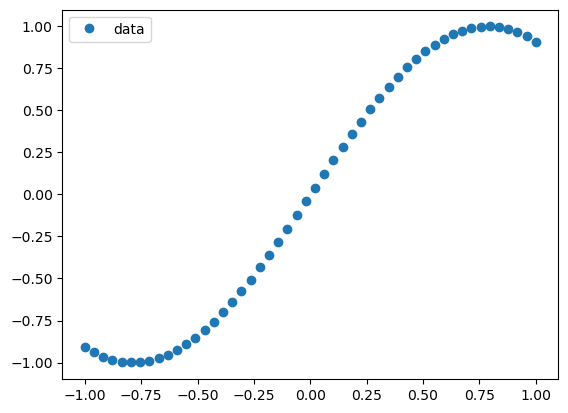

In [2]:
# install pytorch

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

N = 50
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(2*x_data)

plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.legend()
plt.show()

epoch: 0; MSE: 6.89e-01; elapsed time: 0.01 sec
epoch: 1000; MSE: 2.27e-03; elapsed time: 1.15 sec
epoch: 2000; MSE: 5.37e-04; elapsed time: 2.22 sec
epoch: 3000; MSE: 1.46e-04; elapsed time: 3.30 sec
epoch: 4000; MSE: 4.97e-05; elapsed time: 4.36 sec
epoch: 5000; MSE: 2.71e-05; elapsed time: 5.43 sec
epoch: 6000; MSE: 2.39e-05; elapsed time: 6.51 sec
epoch: 7000; MSE: 2.21e-05; elapsed time: 7.61 sec
epoch: 8000; MSE: 2.05e-05; elapsed time: 8.51 sec
epoch: 9000; MSE: 1.94e-05; elapsed time: 9.32 sec


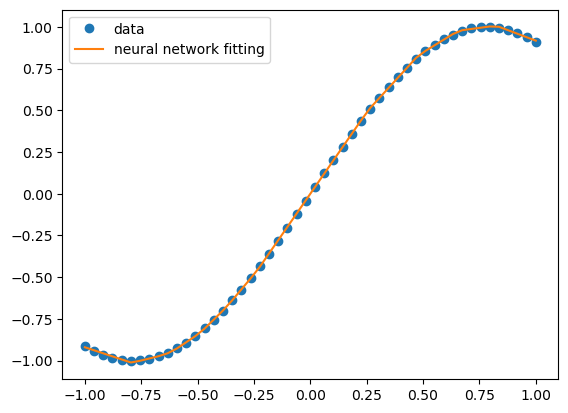

In [5]:
# feedforward neural network with 2 hidden layers
class FNNTwoHiddenLayer(torch.nn.Module):
    
    def __init__(self):
        super(FNNTwoHiddenLayer, self).__init__()    
        
        self.hidden_layer1 = torch.nn.Linear(1, 10)
        self.hidden_layer2 = torch.nn.Linear(10, 10)
        self.output_layer  = torch.nn.Linear(10, 1)
                    
    def forward(self, x):
        
        # input layer
        z = x
        
        # hidden layer 1
        # z = W_1 * z + b_1
        # W_1: 10 * 1
        # b_1: 10 * 1
        z = self.hidden_layer1(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)

        # hidden layer 2
        # z = W_2 * z + b_2
        # W_2: 10 * 10
        # b_2: 10 * 1        
        z = self.hidden_layer2(z)
        # z = ReLU(z)
        z = torch.nn.functional.relu(z)
        
        # output layer
        # z = W_3 * z + b_3
        # W_3: 1 * 10
        # b_3: 1
        z = self.output_layer(z)
        
        # z: 1
        return z


# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
# optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

# Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
optimizer = torch.optim.Adam(fnn2.parameters(), lr=0.001)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    

epoch: 0; MSE: 6.24e-01; elapsed time: 0.01 sec
epoch: 1000; MSE: 6.93e-04; elapsed time: 1.13 sec
epoch: 2000; MSE: 1.88e-04; elapsed time: 2.18 sec
epoch: 3000; MSE: 1.19e-04; elapsed time: 3.23 sec
epoch: 4000; MSE: 1.06e-04; elapsed time: 4.29 sec
epoch: 5000; MSE: 8.83e-05; elapsed time: 5.41 sec
epoch: 6000; MSE: 8.48e-05; elapsed time: 6.51 sec
epoch: 7000; MSE: 5.01e-05; elapsed time: 7.59 sec
epoch: 8000; MSE: 4.73e-05; elapsed time: 8.43 sec
epoch: 9000; MSE: 4.69e-05; elapsed time: 9.21 sec


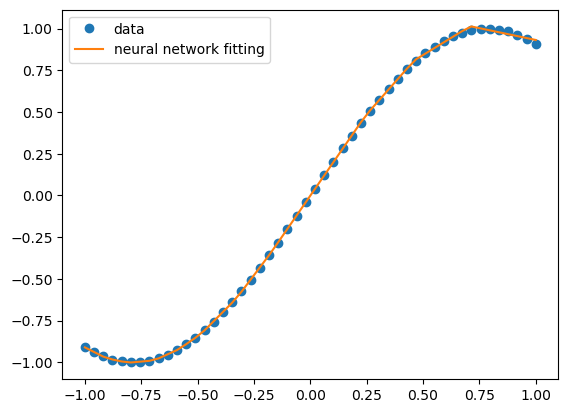

In [6]:

# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
# optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

# Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
optimizer = torch.optim.Adam(fnn2.parameters(), lr=0.001)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    

epoch: 0; MSE: 6.44e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 2.55e-03; elapsed time: 1.12 sec
epoch: 2000; MSE: 1.12e-03; elapsed time: 2.17 sec
epoch: 3000; MSE: 5.89e-04; elapsed time: 3.23 sec
epoch: 4000; MSE: 2.53e-04; elapsed time: 4.29 sec
epoch: 5000; MSE: 9.42e-05; elapsed time: 5.35 sec
epoch: 6000; MSE: 5.06e-05; elapsed time: 6.41 sec
epoch: 7000; MSE: 3.63e-05; elapsed time: 7.27 sec
epoch: 8000; MSE: 2.90e-05; elapsed time: 8.06 sec
epoch: 9000; MSE: 2.51e-05; elapsed time: 8.86 sec


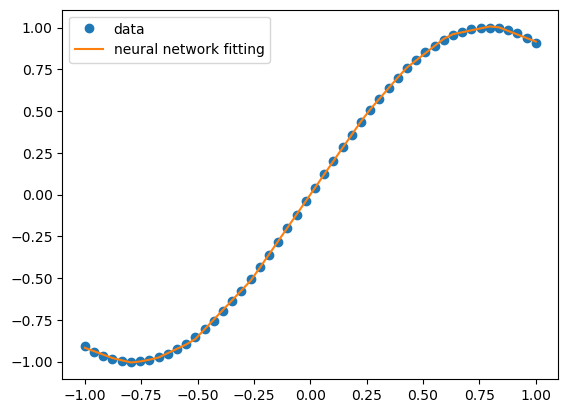

In [8]:

# initialize an object
fnn2 = FNNTwoHiddenLayer()

# MSELoss: mean squared loss
criterion = torch.nn.MSELoss()

# optimization algorithm
# SGD: gradient desent
# lr: learning rate
# optimizer = torch.optim.SGD(fnn2.parameters(), lr=0.001)

# Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class. 
optimizer = torch.optim.Adam(fnn2.parameters(), lr=0.001)

# epoch: number of iterations in optimization algorithm
total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    # initialize gradient to be zero in the optimization algorithm
    optimizer.zero_grad()
    
    # compute the loss function
    loss = criterion(fnn2(x_data), y_data)
    
    # compute the gradient of the loss function: \nabla loss(w,b)
    loss.backward()
    
    # w_(n+1) = w_n - eta * \nabla loss(w_n)
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fnn2(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):
                # hidden layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                # nonlinear layer: z = sigma(z)
                z = self.act_func(z)
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

epoch: 0; MSE: 6.02e-01; elapsed time: 0.00 sec
epoch: 1000; MSE: 1.12e-05; elapsed time: 1.18 sec
epoch: 2000; MSE: 4.61e-06; elapsed time: 2.30 sec
epoch: 3000; MSE: 2.53e-06; elapsed time: 3.45 sec
epoch: 4000; MSE: 2.24e-06; elapsed time: 4.61 sec
epoch: 5000; MSE: 1.11e-06; elapsed time: 5.77 sec
epoch: 6000; MSE: 1.09e-06; elapsed time: 6.94 sec
epoch: 7000; MSE: 1.04e-06; elapsed time: 8.23 sec
epoch: 8000; MSE: 1.01e-06; elapsed time: 9.43 sec
epoch: 9000; MSE: 1.04e-06; elapsed time: 10.67 sec


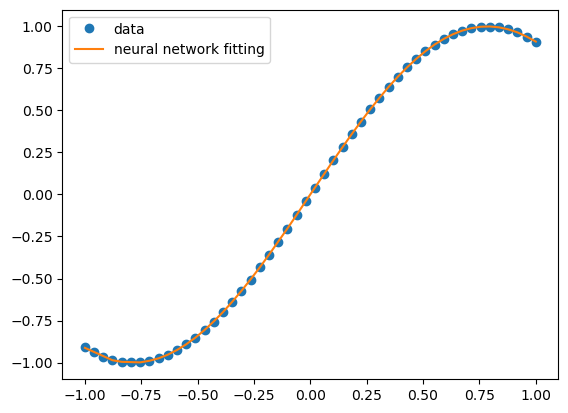

In [4]:
fcn = FNN(input_size=1, output_size=1, num_layers=6, hidden_size=32, activiation='relu')

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):
    # 
    optimizer.zero_grad()

    loss = criterion(fcn(x_data), y_data)

    loss.backward()
    
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    